# MATH 215 Python Assignment 4

## Instructions

* Enter your solutions in cells with `YOUR CODE HERE` (all other cells are ignored by the autograder)
* Run the tests to verify your work (and note some cells contain hidden tests)
* Hidden tests only run during autograding
* Do not import any pacakges (other than the standard packages in the cell below)
* See [Python for UBC Math](https://ubcmath.github.io/python/) for instructions and examples
* Submit the completed notebook to Canvas (download `.ipynb` file to your machine and then upload to Canvas)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Eigenvalues and Eigenvectors

The function `scipy.linalg.eig` computes the eigenvalues and eigenvectors of a matrix $A$. The function returns an array `evals` of eigenvalues and a matrix `evecs` of eigenvectors such that column `evecs[:,i]` corresponds to the eigenvalue `evals[i]`.

For example, consider the matrix

$$
A = \begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix}
$$

The characteristic polynomial is

$$
p(x) = x^2 - 2x + 3 = (x - 3)(x + 1)
$$

The eigenvalues are $\lambda_0 = 3$ and $\lambda_1 = -1$ with corresponding (unit) eigenvectors

$$
\mathbf{v}_0 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}
\hspace{20mm}
\mathbf{v}_1 = \frac{1}{\sqrt{2}} \begin{bmatrix} -1 \\ 1 \end{bmatrix}
$$

Compute the eigenvalues and eigenvectors using `scipy.linalg.eig`:

In [27]:
A = np.array([[1,2],[2,1]])
evals,evecs = la.eig(A)

In [28]:
evals

array([ 3.+0.j, -1.+0.j])

In [29]:
evecs

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Note that eigenvalues are always returned as complex numbers even if the values are (theoretically) real numbers. We can use the function `np.real` to select the real part of an array.

In [30]:
np.real(evals)

array([ 3., -1.])

## Solutions of First Order Linear Systems

Let $A$ be a $d \times d$ matrix with **distinct eigenvalues**. The general solution of the $d$-dimensional first order linear homogeneous system of differential equations $\mathbf{x}' = A \mathbf{x}$ is given by

$$
\mathbf{x}(t) = c_0 e^{\lambda_0 t} \mathbf{v}_0 + c_1 e^{\lambda_1 t} \mathbf{v}_1 + \cdots + c_{d-1} e^{\lambda_{d-1} t} \mathbf{v}_{d-1}
$$

where:

* $\lambda_0,\lambda_1,\dots,\lambda_{d-1}$ are the eigenvalues of $A$
* $\mathbf{v}_0,\mathbf{v}_1,\dots,\mathbf{v}_{d-1}$ are the corresponding eigenvectors of $A$
* $c_0,c_1,\dots,c_{d-1}$ are coefficients which are determined by the initial conditions $\mathbf{x}(0)$

The function `odeA` defined below takes input parameters `A`, `x0` and `t` where:

* `A` is a square matrix of size $d \times d$
* `x0` is a vector of length $d$ representing the initial values $\mathbf{x}(t_0) = \mathbf{x}_0$
* `t` is a vector of $t$ values starting with $t_0$

The function `odeA` returns a matrix `x` such that:

* the number of rows of `x` is equal to the length of `t`
* the number of columns of `x` is equal to the dimension $d$ of the system
* the first row `x[0,:]` is the vector of initial values $\mathbf{x}(t_0) = \mathbf{x}_0$
* the row `x[n,:]` at index $n$ is the vector of approximations of the solution $\mathbf{x}(t_n)$ at time $t_n$
* the value $t_n$ is the entry `t[n]` at index $n$ in the input array `t`
* the column `x[:,i]` is the vector of approximations of the function $x_i(t)$

**Important**: The funciton `odeA` only works for real matrices with **distinct** eigenvalues. We need to do something different for repeated eigenvalues.

In [31]:
def odeA(A,x0,t):
    D,V = la.eig(A)
    c = la.solve(V,x0)
    C = np.diag(c)
    x = (V@C@np.exp(np.outer(D,t))).T.real
    return x

For example, let compute the solution of the system $\mathbf{x}' = A \mathbf{x}$ where

$$
A = \begin{bmatrix} -4 & -5 \\ 5 & 3 \end{bmatrix}
$$

and $\mathbf{x}(0) = [1,1]$. Compute the solution for $t \in [0,10]$ using $201$ values.

In [32]:
A = np.array([[-4.,-5],[5.,3.]])
x0 = np.array([1.,1.])
t = np.linspace(0,10,201)
x = odeA(A,x0,t)

Check the size of `x`.

In [33]:
x.shape

(201, 2)

Plot the columns of `x` with respect to `t`.

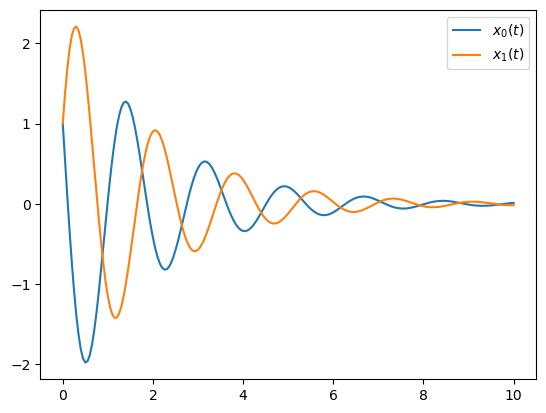

In [34]:
plt.plot(t,x)
plt.legend(['$x_0(t)$','$x_1(t)$'])
plt.show()

Plot the trajectory $(x_0(t),x_1(t))$:

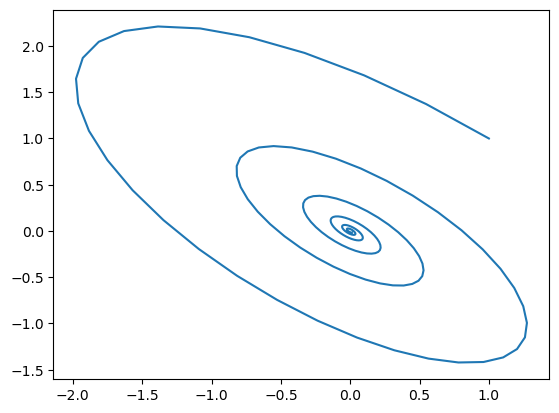

In [35]:
plt.plot(x[:,0],x[:,1])
plt.show()

## Problem 1 (5 marks)

Consider the linear system of differential equations $\mathbf{x}' = A \mathbf{x}$ where

$$
A = \left[ \begin{array}{rrr} -1 & 1 & 0 \\ 1 & 1 & 1 \\ 0 & 1 & 1 \end{array} \right]
$$

**Part A.** The matrix $A$ is symmetric and thereofre the eigenvalues are real. Compute the eigenvalues of $A$, select the real part and save the **largest** eigenvalue as `lambda1a`. We are expecting the value accurate to at least 8 decimal places.

In [36]:
# YOUR CODE HERE
# Define the matrix A
A = np.array([[-1, 1, 0],
              [ 1, 1, 1],
              [ 0, 1, 1]])

# Compute eigenvalues of A
eigenvalues = np.linalg.eigvals(A)

# Extract the real parts of the eigenvalues
real_eigenvalues = np.real(eigenvalues)

# Find the largest eigenvalue
lambda1a = np.max(real_eigenvalues)

# Print the largest eigenvalue
print("The largest eigenvalue is:", lambda1a)

The largest eigenvalue is: 2.1700864866260337


In [37]:
# Test 1: Check if lambda1a is a positive number. (1 mark)
assert lambda1a > 0 , "lambda1a should be positive."
print("Test 1: Success!")

Test 1: Success!


In [38]:
## Test 2: Check if lambda1a is approximately 2.2. (1 mark)
assert np.round(lambda1a,1) == 2.2 , "lambda1a should be approximately 2.2."
print("Test 2: Success!")

Test 2: Success!


In [39]:
# Test 3: Check if lambda1a is the correct value. This cell contains hidden tests. (1 mark)

**Part B.** Determine whether the following statement is **True** or **False**: There exists a (nonzero) initial value vector $\mathbf{x}(0)$ such that the corresponding solution $\mathbf{x}(t)$ of the system $\mathbf{x}' = A \mathbf{x}$ (with matrix $A$ as in part (a) above) satisfies $\| \mathbf{x}(t) \| \to 0$ as $t \to \infty$. Enter your response as either `True` or `False` and save as `observation1b`.

In [40]:
# YOUR CODE HERE
observation1b = False

In [41]:
# Test 1: Check if observation1b is True or False. (1 mark)
assert isinstance(observation1b,bool) , "observation1b should be True or False."
print("Test 1: Success!")

Test 1: Success!


In [42]:
# Test 2: Check if observation1b is the correct value. This cell contains hidden tests. (1 mark)

## Problem 2 (4 marks)

Use the function `odeA` (defined above) to compute the solution of the system $\mathbf{x}' = A\mathbf{x}$ for the matrix

$$
A = \begin{bmatrix} -1 & -1 \\ 1 & -1 \end{bmatrix}
$$

with initial condition $\mathbf{x}(0) = (1,-1)$. Compute the solution for $t \in [0,4]$ and use at least 100 $t$ values. Save the result as `x2`.

In [43]:
# YOUR CODE HERE
A = np.array([[-1.,-1.], [1.,-1.]])
x0 = np.array([1.,-1.])
t = np.linspace(0,4,101)
x2 = odeA(A,x0,t)

In [44]:
# Test 1: Check if x2 is a NumPy array. (1 mark)
assert isinstance(x2,np.ndarray) , "x2 should be a NumPy array."
print("Test 1: Success!")

Test 1: Success!


In [45]:
# Test 2: Check if x2 is has 2 columns and at least 100 rows. (1 mark)
assert x2.shape[0] >= 100 , "x2 should have at least 100 rows."
assert x2.shape[1] == 2 , "x2 should have 2 columns."
print("Test 2: Success!")

Test 2: Success!


In [46]:
# Test 3: Check if x2 has the correct initial values and last values. (1 mark)
assert np.allclose(x2[0,:],[1,-1])  , "First row of x2 should be [1,-1]."
assert np.allclose(x2[-1,:],[-0.02583322,-0.00188942],rtol=0,atol=0.1)  , "Last row of x2 should be approximately [-0.026, -0.002]."
print("Test 3: Success!")

Test 3: Success!


In [47]:
# Test 4: Check if x2 has the correct values. This cell contains hidden tests. (1 mark)

Plot with some of the exact values to verify your solution is correct.

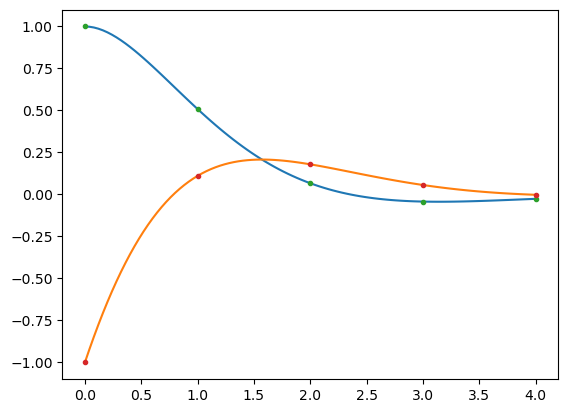

In [48]:
plt.plot(t,x2)
plt.plot([0,1,2,3,4],[1.,0.50832599,0.06674067,-0.04226287,-0.02583322],'.')
plt.plot([0,1,2,3,4],[-1.,0.11079377,0.17937937,0.05631478,-0.00188942],'.')
plt.show()

And plot the trajectory with some of the exact values to verify your solution is correct.

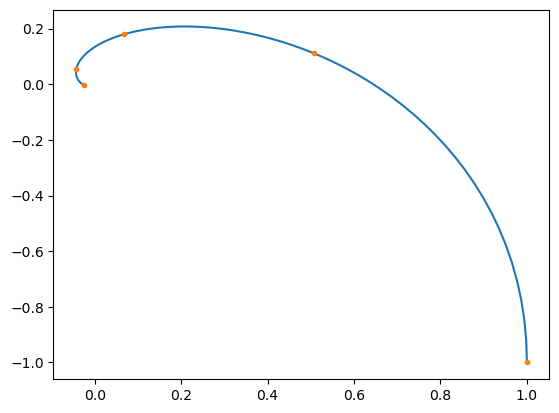

In [49]:
plt.plot(x2[:,0],x2[:,1])
plt.plot([1.,0.50832599,0.06674067,-0.04226287,-0.02583322],[-1.,0.11079377,0.17937937,0.05631478,-0.00188942],'.')
plt.show()

## Problem 3 (4 marks)

Consider a system of 3 tanks containing salt water solution such that each tank contains $V$ litres of solution and each flows into the others at a rate $Q$ litres per minute. Let $M_1(t)$, $M_2(t)$, and $M_3(t)$ be the mass of salt in each tank at time $t$. Applying the principle of conservation of mass we find the system is described by equations

$$
\begin{aligned}[t]
\frac{dM_1}{dt} &= \frac{M_2}{V} Q + \frac{M_3}{V} Q - 2\frac{M_1}{V} Q \\
\frac{dM_2}{dt} &= \frac{M_1}{V} Q + \frac{M_3}{V} Q - 2\frac{M_2}{V} Q \\
\frac{dM_3}{dt} &= \frac{M_1}{V} Q + \frac{M_2}{V} Q - 2\frac{M_3}{V} Q
\end{aligned}
$$

Use the function `odeA` to compute the solution over the interval $0 \leq t \leq 40$ for $Q = 50$, $V = 1000$ and initial values $M_1(0) = 0$, $M_2(0) = 500$, and $M_3(0) = 100$. Use at least 4000 $t$ values. Save the solution as `M3`.

The first column `M3[:,0]` corresponds to $M_1(t)$, the second column `M3[:,1]` corresponds to $M_2(t)$ and the third column `M3[:,2]` corresponds to $M_3(t)$.

In [56]:
# YOUR CODE HERE
A = np.array([[-1/10., 1/20., 1/20.], [1/20., -1/10., 1/20.], [1/20., 1/20., -1/10.]])
x0= np.array([0.,500.,100.])
t = np.linspace(0, 40, 4000)
M3 = odeA(A, x0,t)

In [57]:
# Test 1: Check if M3 is a NumPy array. (1 mark)
assert isinstance(M3,np.ndarray) , "M3 should be a NumPy array."
print("Test 1: Success!")

Test 1: Success!


In [58]:
# Test 2: Check if M3 is has 3 columns and at least 4000 rows. (1 mark)
assert M3.shape[0] >= 4000 , "M3 should have at least 4000 rows."
assert M3.shape[1] == 3 , "M3 should have 3 columns."
print("Test 2: Success!")

Test 2: Success!


In [59]:
# Test 3: Check if M3 has the correct initial values and last values. (1 mark)
assert np.allclose(M3[0,:],[0,500,100]) , "First row of M3 should be [0,500,100]."
assert np.allclose(M3[-1,:],[199.50424956, 200.74362565, 199.75212478],rtol=0,atol=0.1) , "Last row of M3 should be approximately [200,200,200]."
print("Test 3: Success!")

Test 3: Success!


In [60]:
# Test 4: Check if M3 has the correct values. This cell contains hidden tests. (1 mark)

*Reflection*: The symmetry of the tank system implies that the salt concentration in each tank should converge to the same value as $t \to \infty$. In particular, $M_1(t)$, $M_2(t)$ and $M_3(t)$ should all converge to

$$
\frac{M_1(0) + M_2(0) + M_3(0)}{3}
$$

as $t \to \infty$. Does this statement agree with the figure below?

In [61]:
plt.plot(t,M)
plt.legend(['$M_1(t)$','$M_2(t)$','$M_3(t)$'])
plt.show()

NameError: name 'M' is not defined